<center> <h2> TP2  : k-plus proches voisins, analyse discriminante et régression logistique </h2> </center>

On rappelle ici le cadre de la classification supervisée, et l’on présente les notations que l’on utilisera
dans la suite. Il est à noter que pour ce TP on considère un cadre plus général qu’au TP précédent : le
nombre de classes peut-être plus grand que deux.

In [1]:
from utilsknn import *
from matplotlib.pyplot import figure
# Import train_test_split
from sklearn.model_selection import train_test_split

############ suppression des warnings ###############

import warnings
warnings.filterwarnings('ignore')


########### on fixe le seeed #####################
import random

random.seed(12345)

### Question 1 
Génération des données aléatoires

gaussienne bi-dimensionnelle

In [2]:
X_rgauss,y_rgauss=rand_bi_gauss(n1=100, n2=100, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.1, 0.1],
                  sigmas2=[0.1, 0.1])
X_rtrigauss,y_rtrigauss=rand_tri_gauss(n1=50, n2=50, n3=50, mu1=[1, 1],
                   mu2=[-1, -1], mu3=[1, -1], sigma1=[0.9, 0.9],
                   sigma2=[0.9, 0.9], sigma3=[0.9, 0.9])

X_rclown,y_rclown=rand_clown(n1=100, n2=100, sigma1=1, sigma2=2)
X_rchecker,y_rchecker=rand_checkers(n1=150, n2=150, sigma=0.1)

### Question 2 
Visualisation des jeux de données

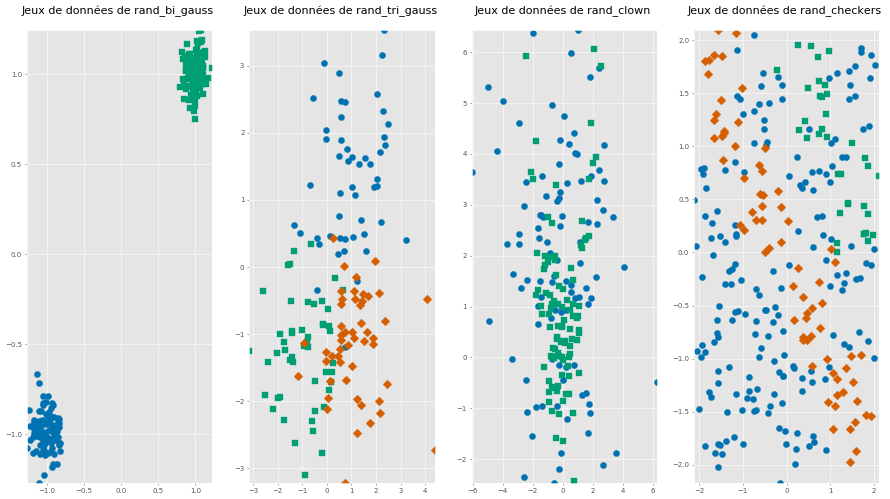

In [3]:
figure(num=None, figsize=(22, 12), dpi=50, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

plt.subplot(1, 4, 1)
plt.title("Jeux de données de rand_bi_gauss \n",fontsize=16)
plot_2d(X_rgauss,y=y_rgauss, w=None, alpha_choice=1)

plt.subplot(1, 4, 2)
plt.title("Jeux de données de rand_tri_gauss \n",fontsize=16)
plot_2d(X_rtrigauss,y=y_rtrigauss, w=None, alpha_choice=1)

plt.subplot(1, 4, 3) 
plt.title("Jeux de données de rand_clown \n",fontsize=16)
plot_2d(X_rclown,y=y_rclown, w=None, alpha_choice=1)

plt.subplot(1, 4, 4)
plt.title("Jeux de données de rand_checkers \n",fontsize=16)
plot_2d(X_rchecker,y=y_rchecker, w=None, alpha_choice=1)

### Question 3

Afin d'utiliser l'algorithme KNN dans un problème de regression , on pourrait utiliser la valeur moyenne de k plus proches voisins . Le calcul de la distance se fait comme l'approche de classification , pour un vecteur d'attributs données ,on cherche les k observations les plus proches et on calcule la valeur moyenne des Yk . 
On pourrait également considérer la médiane ou la moyenne robuste au lieu d'une moyenne classique .

### Question 4
Implémentation de KNNClassifier avec les méthodes d’apprentissage fit et de classification predict. 
L'approche consiste à calculer la distance de chaque point de prédictions aux observations de train et renvoyer le label **le plus majoritaire**

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter

def get_eculidean_distance(X,point,k):
    euc_distance = np.sqrt(np.sum((X - point)**2 , axis=1))
    return np.argsort(euc_distance)[0:k]


#class KNNClassifier(BaseEstimator, ClassifierMixin)

class KNNClassifier(BaseEstimator, ClassifierMixin):
#""" Homemade kNN classifier class """
    ## initialisation avec le nombre de voisins
    def __init__(self, n_neighbors=1):
        self.n_neighbors=n_neighbors
    
    ## il n'y a pas de fitting dans le knn classifier , on ne fait que recalculer
    ## les distances pour chaque prédiction. 
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
    
    
    ## La fonction prédict qui calcule les distances de chaque point de prédiction au jeux de données et renvoie 
    ## le label le plus majoitaire
    def predict(self, prediction_points):
        points_labels=[] # on initialise les labels de prédicitons
        for point in prediction_points:#on parcourt le test set et on calcule les distances au train.
            distances=get_eculidean_distance(self.X_train,point,self.n_neighbors)
        
            results=[]
            for index in distances:
                results.append(self.y_train[index])
            
            label=Counter(results).most_common(1) 
            points_labels.append(label[0][0]) ## label[0][0]contient le label majoritaire 
        
        return np.array(points_labels  )       

Essayons maintenant de comparer le modèle implémenter au classifieur KNeighborsClassifier de scikit-learn . On testera les deux modèles sur le jeux de données rgauss , en prenant comme paramètre K=5 . 
On fera le train sur les observations paires et le test sur le observations impaires.

In [5]:
############ comparaison avec scikit learn #############
from sklearn.neighbors import KNeighborsClassifier

kneighbors=5
### on se limite aux indices pairs pour le train
y_train_rtrigausspair=y_rtrigauss[0::2]
X_train_rtrigausspair=X_rtrigauss[0::2]

### les indices impairs pour le test
y_test_rtrigausspair=y_rtrigauss[1::2]
X_test_rtrigausspair=X_rtrigauss[1::2]

### classifieur fromscratch
knnscratchclassifier=KNNClassifier(kneighbors)
knnscratchclassifier.fit(X_train_rtrigausspair,y_train_rtrigausspair)
pred=knnscratchclassifier.predict(X_test_rtrigausspair)
error_knn_scratch = np.mean(knnscratchclassifier.predict(X_test_rtrigausspair) != y_test_rtrigausspair)


### classifieur scikit learn
clrKN = KNeighborsClassifier(kneighbors)
clrKN = clrKN.fit(X_train_rtrigausspair,y_train_rtrigausspair)
error_knn_scikit = np.mean(clrKN.predict(X_test_rtrigausspair) != y_test_rtrigausspair)


print("_________________________________________________________________________")
print("Erreur classifieur KNN scratch |   Erreur classifieur KNN sickit learn   ")
print("_______________________________|_________________________________________")
print("           %.2f %%             |              %.2f %%            " % (100*error_knn_scratch,100*error_knn_scikit))


_________________________________________________________________________
Erreur classifieur KNN scratch |   Erreur classifieur KNN sickit learn   
_______________________________|_________________________________________
           14.67 %             |              14.67 %            


On vérifie bien que la méthode implementée donne exactement le meme taux d'erreur que l'algorithme KNN de Scikit-learn

### Question 5

Jeux de donnees #1
Jeux de donnees #2
Jeux de donnees #3
Jeux de donnees #4


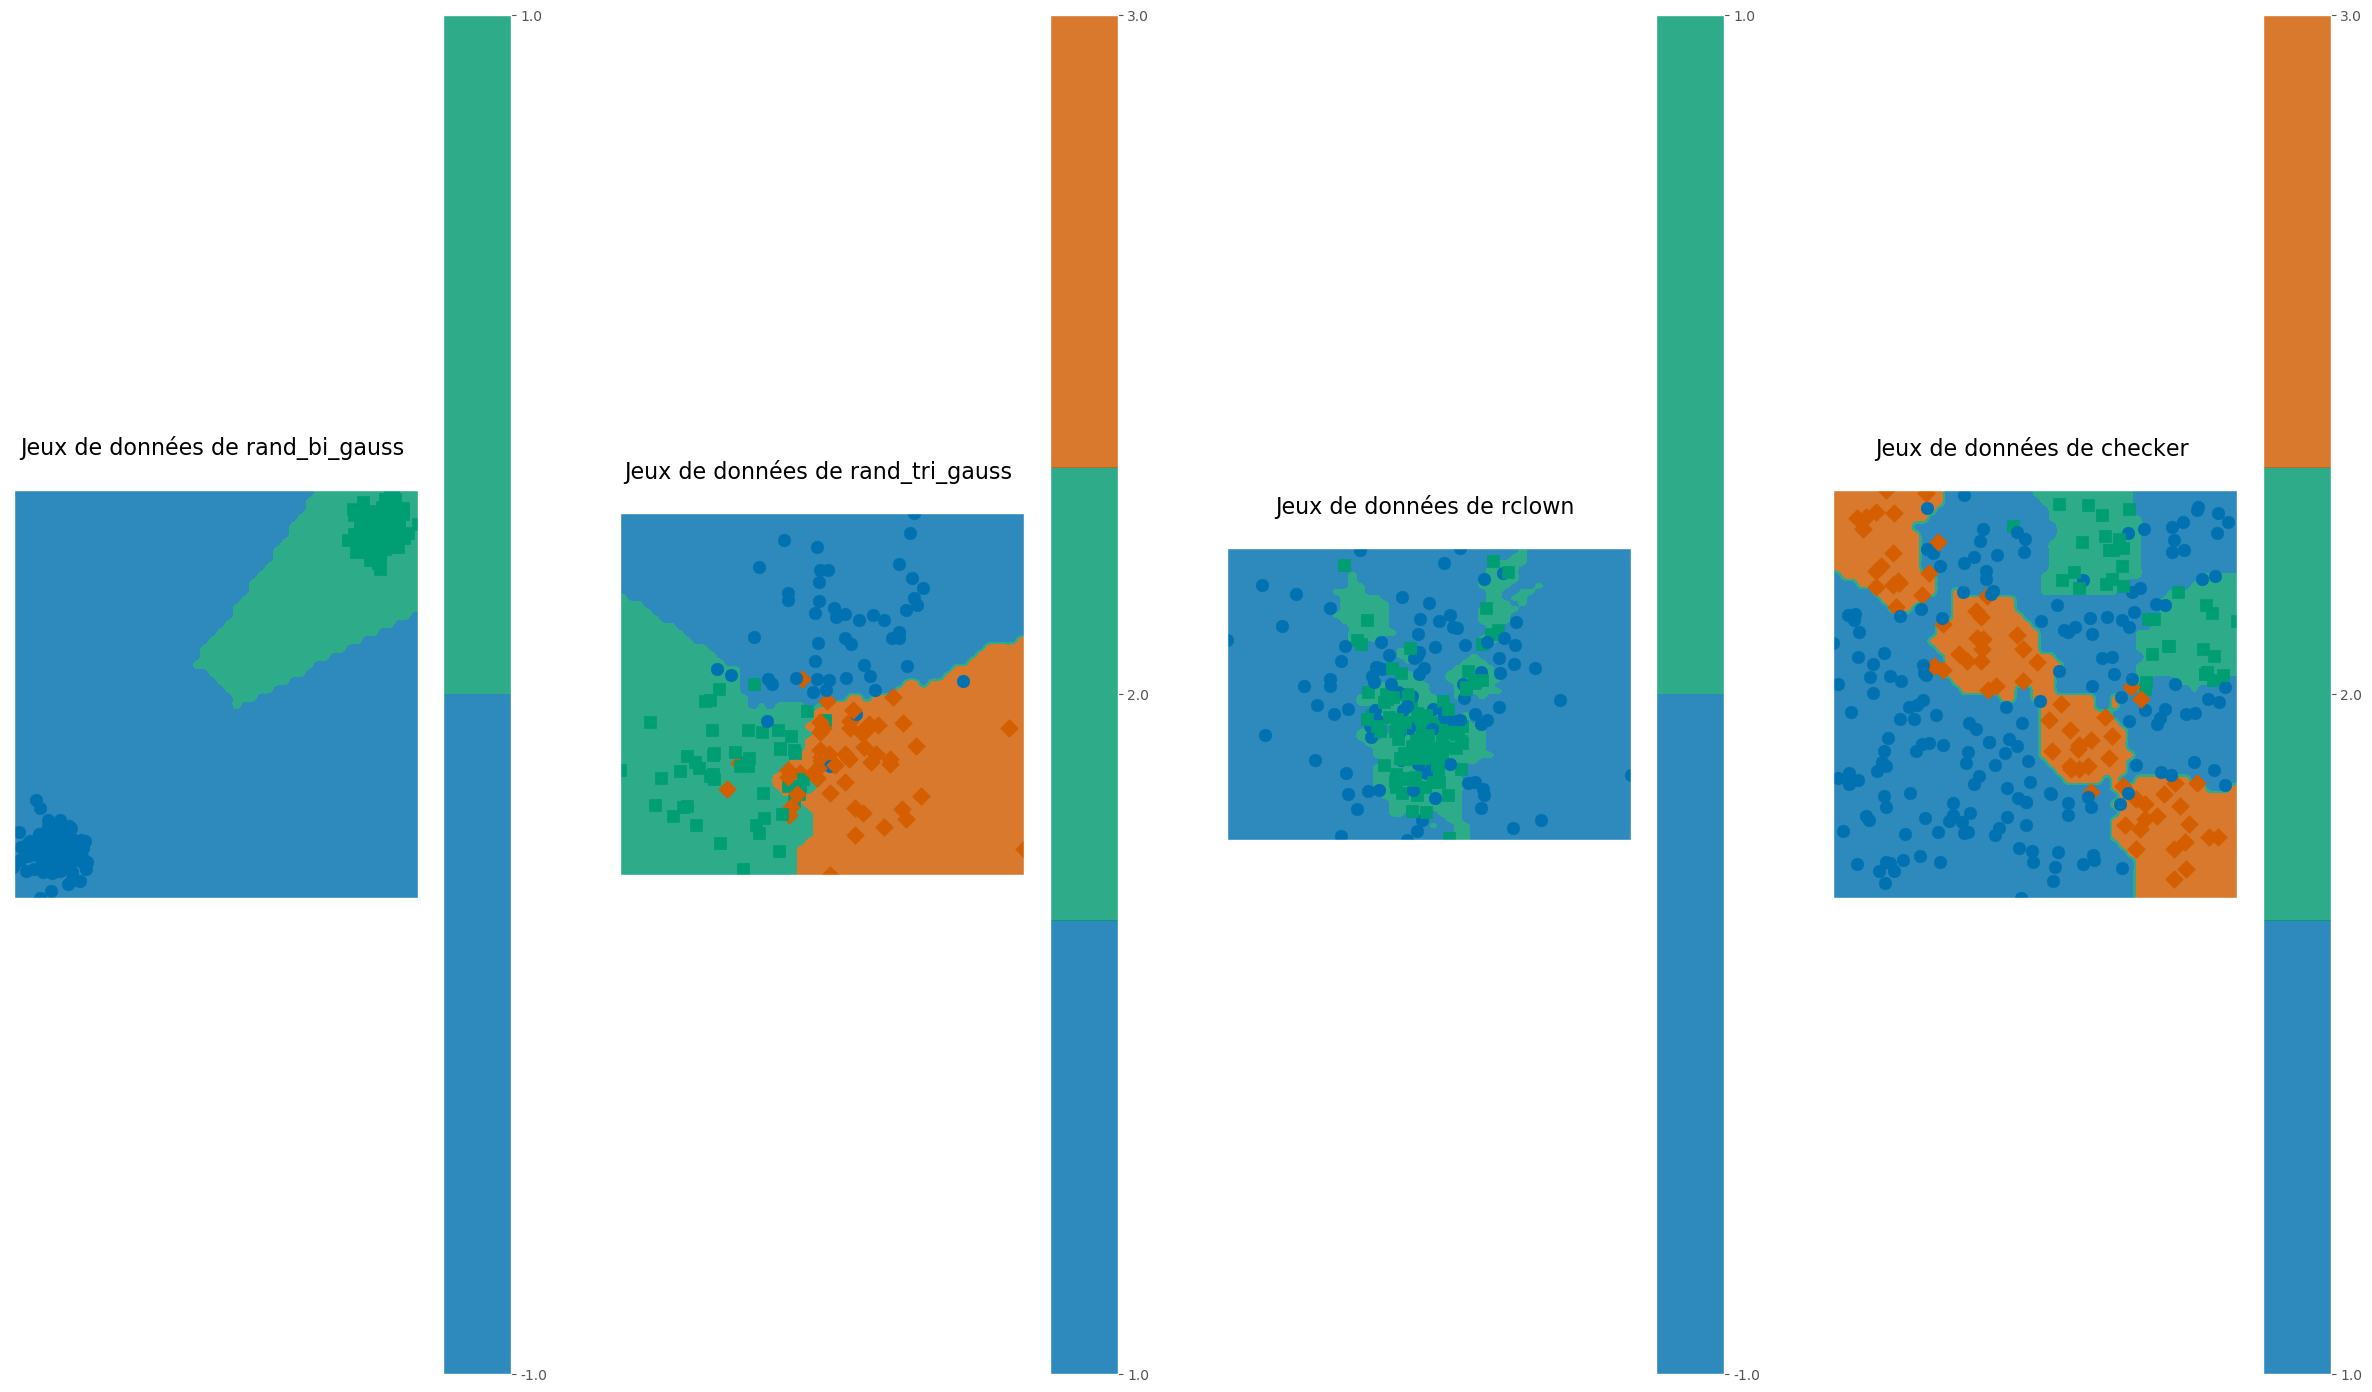

In [6]:
###  affichage des frontière
%matplotlib notebook 
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

####################################### jeux de données #1 ##################################
print("Jeux de donnees #1")
figure(num=None, figsize=(30, 18), dpi=100, facecolor='w', edgecolor='k')
plt.style.use("ggplot")
clrKN = KNeighborsClassifier(5 ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rgauss)})
clrKN = clrKN.fit(X_rgauss,y_rgauss)

def reshapefrontiere(X) :
    return clrKN.predict(X.reshape(1,-1))
plt.subplot(1, 4, 1)
plt.title("Jeux de données de rand_bi_gauss \n",fontsize=16)

frontiere_new(reshapefrontiere, X_rgauss, y_rgauss, w=None, step=50, alpha_choice=1, colorbar=True,
               samples=True)

####################################### jeux de données #2 ##################################
print("Jeux de donnees #2")
###  affichage des frontière
clrKN = KNeighborsClassifier(5 ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rtrigauss)})
clrKN = clrKN.fit(X_rtrigauss, y_rtrigauss)

def reshapefrontiere(X) :
    return clrKN.predict(X.reshape(1,-1))
plt.subplot(1, 4, 2)
plt.title("Jeux de données de rand_tri_gauss \n",fontsize=16)

frontiere_new(reshapefrontiere, X_rtrigauss, y_rtrigauss, w=None, step=50, alpha_choice=1, colorbar=True,
               samples=True)

####################################### jeux de données #3 ##################################
print("Jeux de donnees #3")

clrKN = KNeighborsClassifier(5 ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rclown)})
clrKN = clrKN.fit(X_rclown,y_rclown)

def reshapefrontiere(X) :
    return clrKN.predict(X.reshape(1,-1))
plt.subplot(1, 4, 3)
plt.title("Jeux de données de rclown \n",fontsize=16)

frontiere_new(reshapefrontiere, X_rclown,y_rclown, w=None, step=50, alpha_choice=1, colorbar=True,
               samples=True)

####################################### jeux de données #4 ##################################

print("Jeux de donnees #4")

clrKN = KNeighborsClassifier(5 ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rchecker)})
clrKN = clrKN.fit(X_rchecker,y_rchecker)

def reshapefrontiere(X) :
    return clrKN.predict(X.reshape(1,-1))
plt.subplot(1, 4, 4)
plt.title("Jeux de données de checker \n",fontsize=16)
    
frontiere_new(reshapefrontiere, X_rchecker,y_rchecker, w=None, step=50, alpha_choice=1, colorbar=True,
               samples=True)


## Question 6

Pour les observations d’indice pair du jeu de données 2 , faites varier le nombre k de voisins pris en compte :
k= 1...n. Que devient la méthode dans le cas extrême où k = 1 , k=n? Afficher ces cas sur les données étudiées en utilisant la fonction frontiere_new et présentez les dans une forme facilement lisible. Dans quels cas la frontière est-elle complexe ? simple ?

Jeux de donnees #2


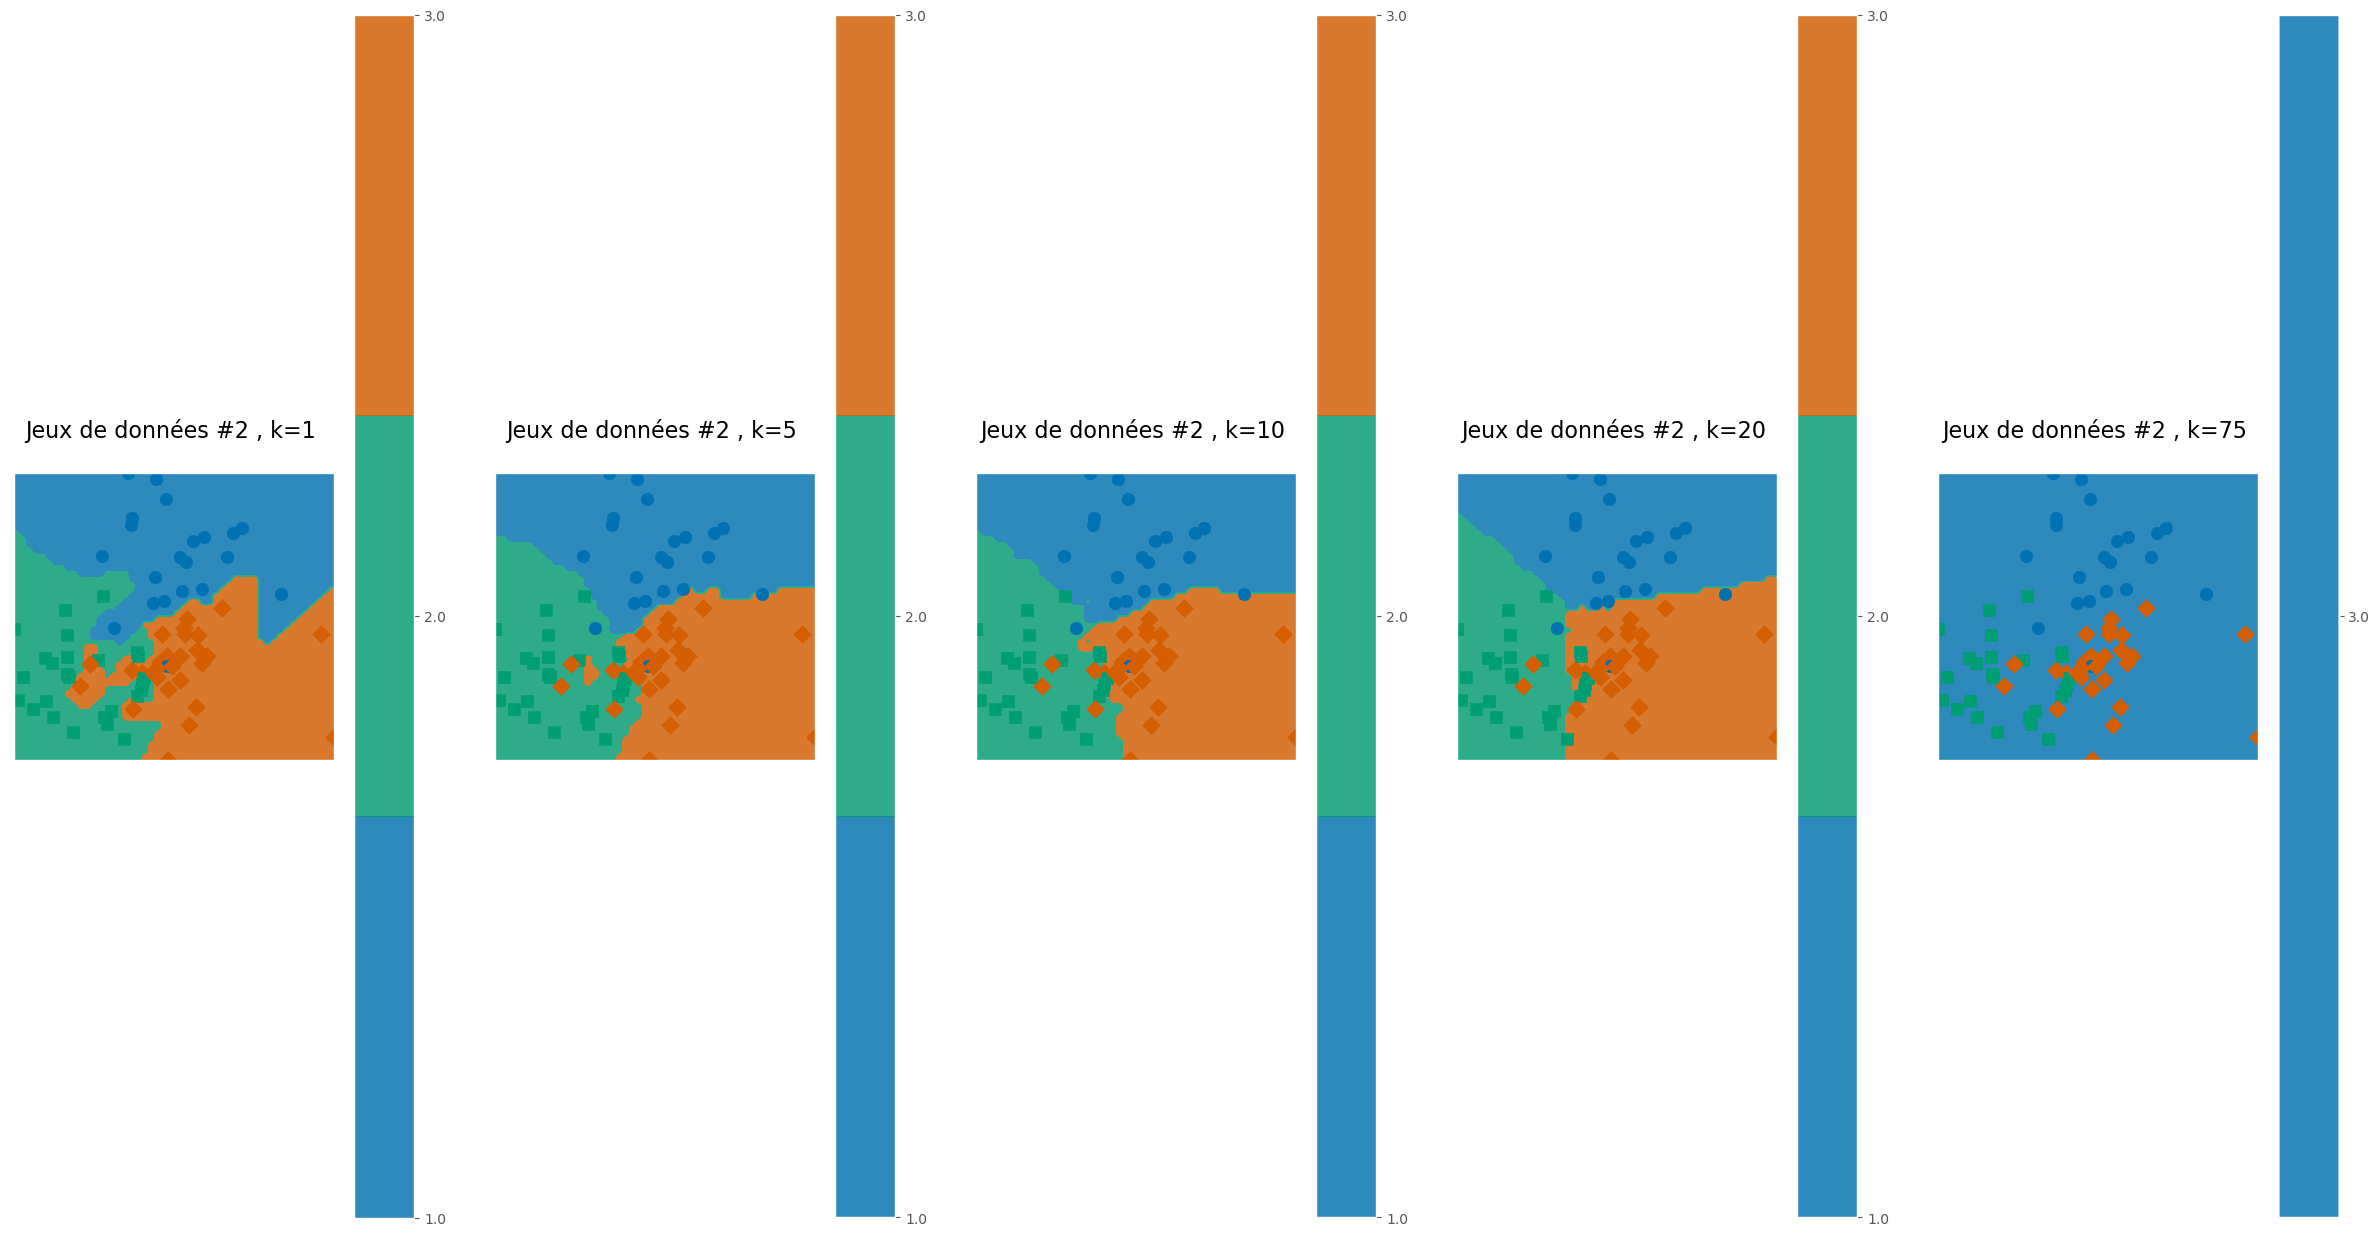

In [7]:
print("Jeux de donnees #2")
###  affichage des frontière
%matplotlib notebook 
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
#fig, axes = plt.subplots(ncols=8, figsize=(12, 5), sharey=True)
%matplotlib notebook 
%matplotlib inline

figure(num=None, figsize=(30, 18), dpi=100, facecolor='w', edgecolor='k')
plt.style.use("ggplot")


### on se limite aux indices pairs
y_rtrigausspair=y_rtrigauss[0::2]
X_rtrigausspair=X_rtrigauss[0::2]

### le nombre de k à tester
k_range=[1,5,10,20,len(y_rtrigausspair)]

for i,k in enumerate (k_range) :
    clrKN = KNeighborsClassifier(k ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rtrigauss)})
    clrKN = clrKN.fit(X_rtrigausspair, y_rtrigausspair)
    def reshapefrontiereclass(X) :
        return clrKN.predict(X.reshape(1,-1))
    plt.subplot(1, 5, i+1)
    plt.title("Jeux de données #2 , k=%s \n"%k,fontsize=16)
    frontiere_new(reshapefrontiere, X_rtrigausspair, y_rtrigausspair, w=None, step=50, alpha_choice=1, colorbar=True,
                   samples=True)






On voit bien que la complexité de la frontière diminue avec k . Pour k=1 , on arrive à bien classifier meme les outliers , qui sont des points complexes qui ne sont pas faciles à atteindre  ( on dit que notre algorithme overfit les données ) . Cette complexité diminue jusqu'à attendre k= n où on aua un classifieur qui renvoie une seule classe ( on prédit toujours la classe majoritaire) 

## Question 7

Une variante possible très utilisée consiste à pondérer les poids du jème voisin  
On implémentera la fonction custom_weights qui prend comme input le paramètre h et renvoie la fonction de calcul des poids .

In [8]:
import numpy as np
def custom_weights(h):
    def _weight_func(dist):
        retval = np.exp(-dist*dist/h)
        return retval
    return _weight_func

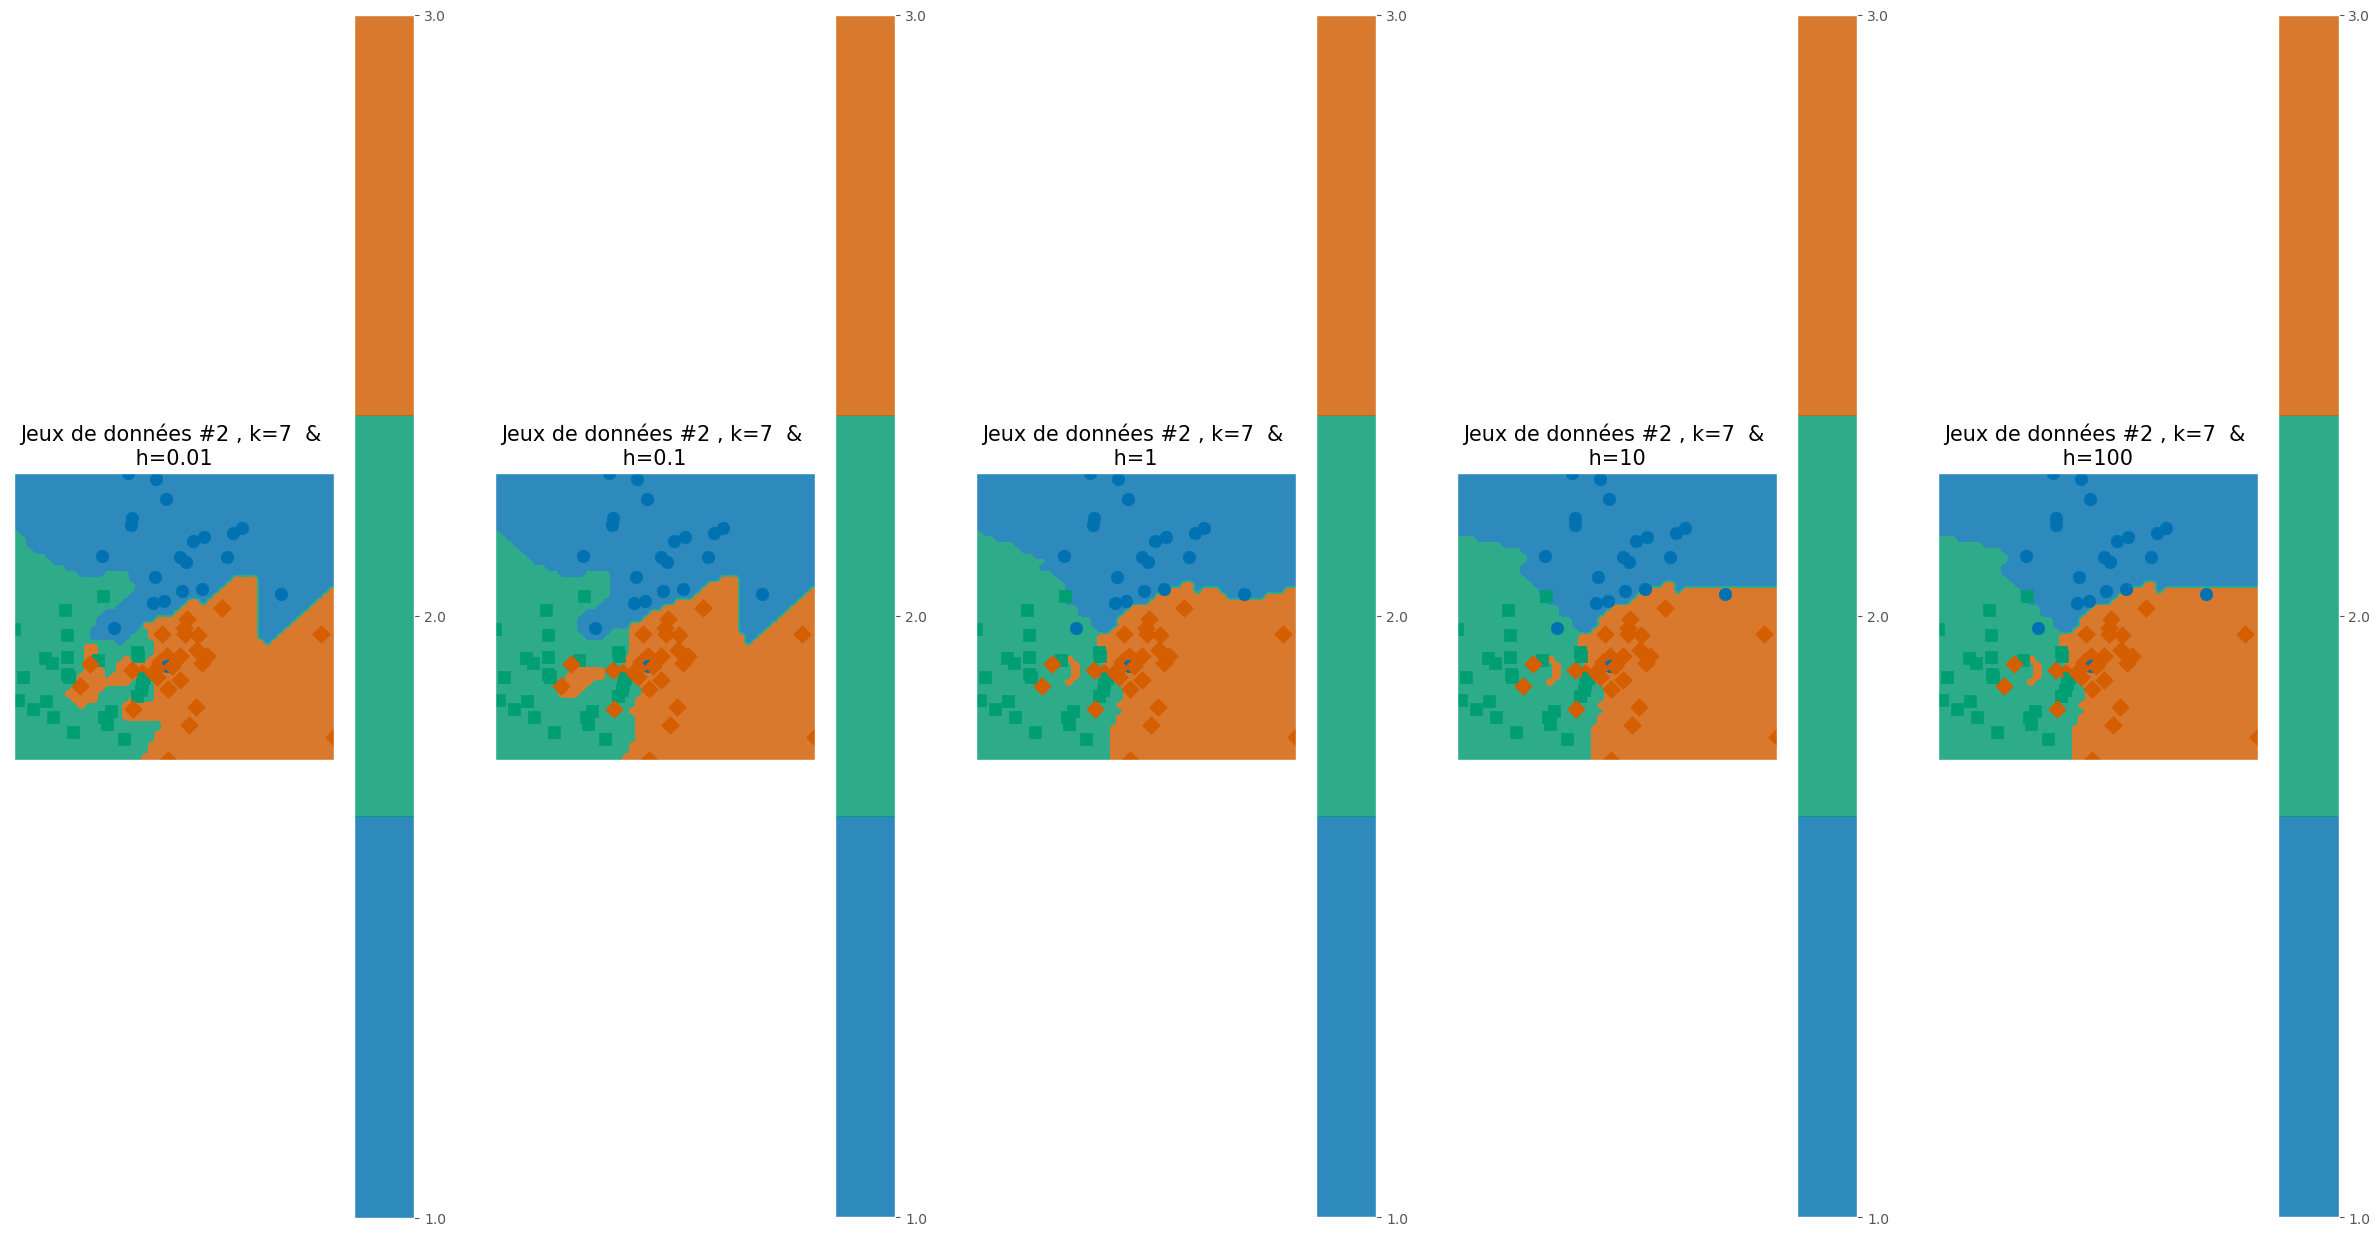

In [9]:
figure(num=None, figsize=(30, 18), dpi=100, facecolor='w', edgecolor='k')
plt.style.use("ggplot")


h_list =list(map(lambda x:10**x , [-2,-1,0,1,2]))
k=7
for i,h in enumerate(h_list):
    clrKN = KNeighborsClassifier(k ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rtrigausspair)},weights=custom_weights(h=h))

    clrKN = clrKN.fit(X_rtrigausspair, y_rtrigausspair)
    def reshapefrontiere(X) :
        return clrKN.predict(X.reshape(1,-1))
    plt.subplot(1, 5, i+1)
    plt.title("Jeux de données #2 , k=7  & \n h=%s "%h,fontsize=15)

    frontiere_new(reshapefrontiere, X_rtrigausspair, y_rtrigausspair, w=None, step=50, alpha_choice=1, colorbar=True,
                       samples=True)

D'après les graphes ci-dessus , on voit qu'une valeur faible de k rend le classifieur sensible aux points et on aura une frontière complexe qui overfit les points .L'utilisation d'une grande valeur de k rend la classification beaucoup moins sensible au poids 

## Question 8

Essayons d'évaluer l'algorithme sur le train et le test . 
On fixe le paramètre **K** à 1 

In [10]:
from sklearn.metrics import confusion_matrix
import math

k=1 ## on fixe k=1
h=10 ## on fixe h=10

## fit le modèle sur les indices paires 
clrKN = KNeighborsClassifier(k ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rtrigausspair)},weights=custom_weights(h=h))
clrKN = clrKN.fit(X_rtrigausspair, y_rtrigausspair)

# calcul d'erreur sur l'échantillon d'apprentissage  en passant par la matrice de confusion 
con_mat = confusion_matrix(y_rtrigausspair,clrKN.predict(X_rtrigausspair), [1,2,3])
#print("Confusion matrix :%s" %con_mat)
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]+con_mat[2, 2]) / float(np.sum(con_mat))
print("L'erreur sur l'échantillon d'apprentissage est %.2f %%" % (100*(1-total_accuracy)))

##### preparing test set #####
y_rtrigaussimpair=y_rtrigauss[1::2]
X_rtrigaussimpair=X_rtrigauss[1::2]

##### calcul d'erreur sur l'échantillon de test
con_mat = confusion_matrix(y_rtrigaussimpair,clrKN.predict(X_rtrigaussimpair), [1,2,3])
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]+con_mat[2, 2]) / float(np.sum(con_mat))
print("L'erreur sur l'échantillon de test est %.2f %%" % (100*(1-total_accuracy)))

L'erreur sur l'échantillon d'apprentissage est 0.00 %
L'erreur sur l'échantillon de test est 24.00 %


On voit bien que , pour k=1 , le classifieur overfit les données d'apprentissage avec un taux d'erreur 0% et il est beaucoup moins bon sur les données de test .De ce fait , on recommande d'utiliser une valeur de k supérieur à 1 ( et différente du nombre d'observations ) . Il y a des méthodes permettant de bien choisir ce paramètre à l'instar de la Cross-Validation

## Question 9 
On se focalise dans cette question au jeux de données #4 . 
On a modifié légèrement la fonction "errorcurve" pour qu'elle renvoie la liste des valeurs de k et les erreurs associées

Number of training points = 144 , best k =8 


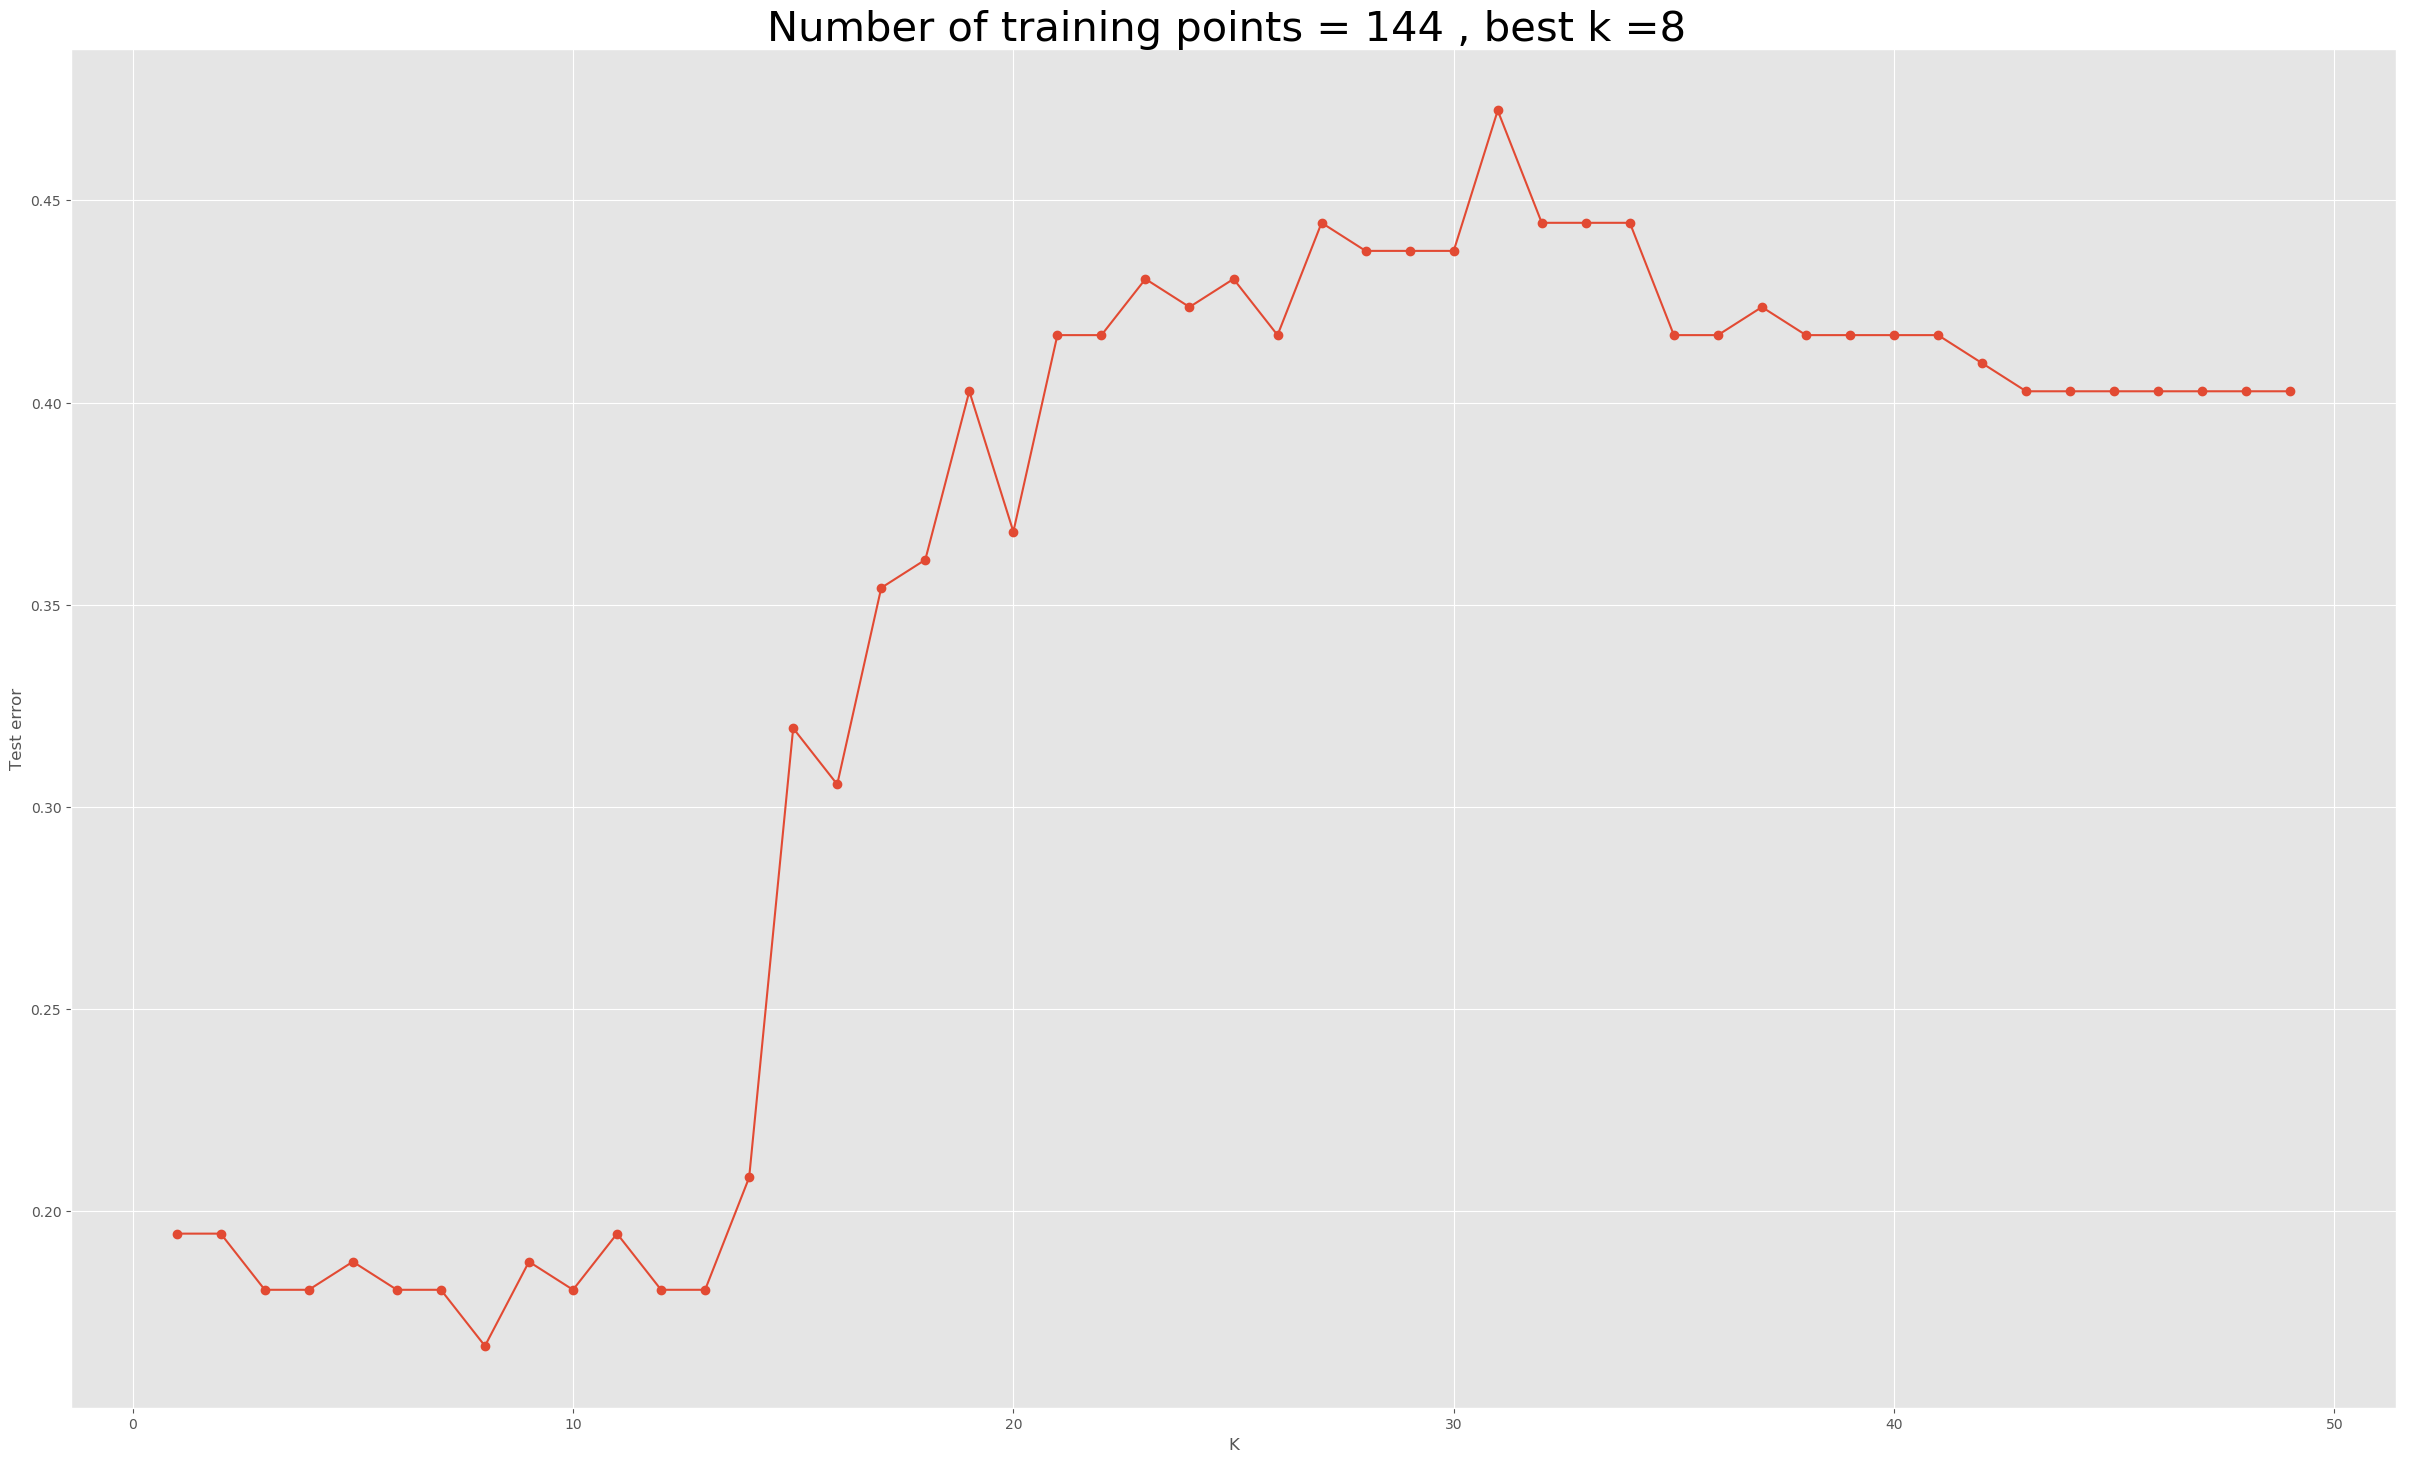

In [11]:
figure(num=None, figsize=(30, 18), dpi=100, facecolor='w', edgecolor='k')
plt.style.use("ggplot")
h=10 ### on fixe h=10

X_rchecker,y_rchecker

############# split des données en pairs en impairs
y_rcheckerair=y_rchecker[0::2]
X_rcheckerpair=X_rchecker[0::2]

y_rcheckerimpair=y_rchecker[1::2]
X_rcheckerimpair=X_rchecker[1::2]

##### traçage de la courbe d'erreur pour k=1..50
errorcurve=ErrorCurve(range(1,50),weights=custom_weights(h=h))
errorcurve.fit_curve(X_rcheckerpair,y_rcheckerair,X_rcheckerimpair,y_rcheckerimpair)
listk=errorcurve.getk()## wee added a function getk that returns the errors for each k

errorcurve.plot()
plt.title("Number of training points = %s , best k =%s "%(len(y_rcheckerair),np.argmin(listk,axis=1)[1]+1),fontsize=30)
print("Number of training points = %s , best k =%s "%(len(y_rcheckerair),np.argmin(listk,axis=1)[1]+1))


## Question 10

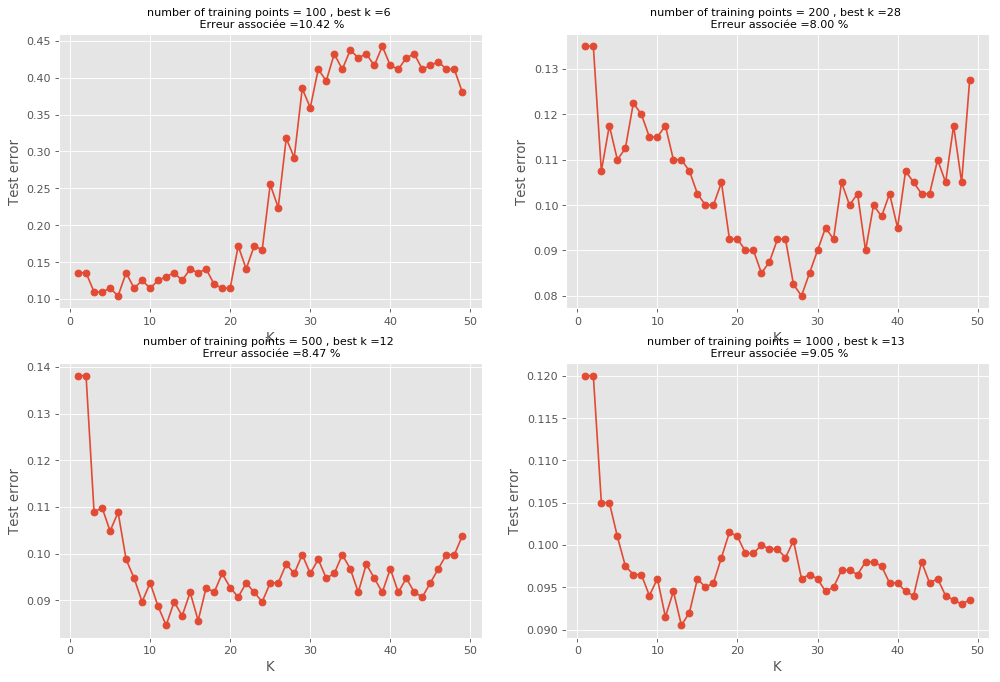

In [12]:
n_obs=[100,200,500,1000]
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")
bestk_1000=0
for i,n in enumerate(n_obs):
    X_rchecker_train,y_rchecker_train=rand_checkers(n1=n, n2=n, sigma=0.1)
    X_rchecker_test,y_rchecker_test=rand_checkers(n1=n, n2=n, sigma=0.1)
    errorcurve=ErrorCurve(range(1,50),weights=custom_weights(h=h))
    errorcurve.fit_curve(X_rchecker_train,y_rchecker_train,X_rchecker_test,y_rchecker_test)
    listk=errorcurve.getk()## wee added a function getk that returns the errors for each k
    plt.subplot(2,2, i+1)
    errorcurve.plot()
    plt.title("number of training points = %s , best k =%s \n Erreur associée =%.2f %%" %(n,np.argmin(listk,axis=1)[1]+1,100*min(listk[1])),fontsize=10)
    bestk_1000=np.argmin(listk,axis=1)[1]+1
#plt.show()

D'après les figures ci-dessous , on constate que la valeur du meilleur paramètre **k** dépend de la taille de jeux de données . Essayons maintenant de visualiser les règles de décisions pour n=1000 .

In [13]:
print("Pour n=1000 , la meilleur valeur de k est %s" %bestk_1000)


Pour n=1000 , la meilleur valeur de k est 13


Text(0.5,1,'Les règles de décision pour le jeux de données #4 pour K=13 et n=1000 ')

<Figure size 1200x800 with 0 Axes>

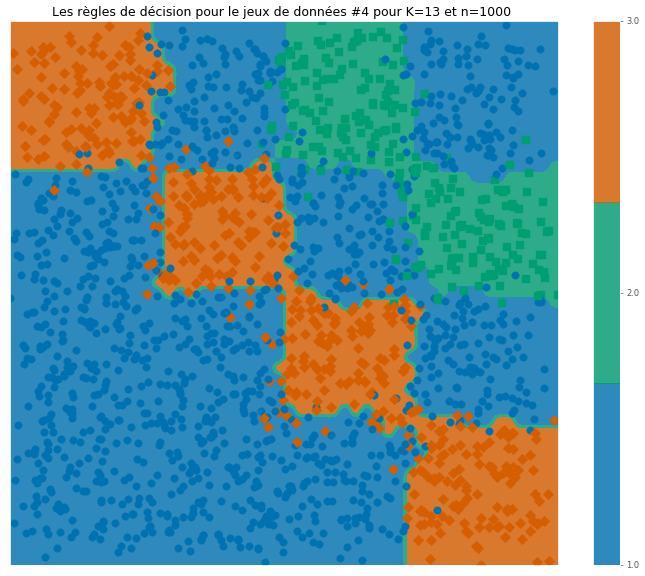

In [14]:
### graph pour n=1000
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")
k=bestk_1000 ### meilleur k
h=10
n=1000

## attention , il faut pas regénerer à nouveau les données , sinon la valeur de k changera
#X_rchecker_train,y_rchecker_train=rand_checkers(n1=n, n2=n, sigma=0.1)
#X_rchecker_test,y_rchecker_test=rand_checkers(n1=n, n2=n, sigma=0.1)

## initialiser le modèle avec la meilleur valeur de k trouvée pour n=1000
clrKN = KNeighborsClassifier(k ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rchecker_train)},weights=custom_weights(h=h))

## fit le modèle
clrKN = clrKN.fit(X_rchecker_train,y_rchecker_train)

def reshapefrontiere(X) :
    return clrKN.predict(X.reshape(1,-1))

figure(num=None, figsize=(15, 12), dpi=60, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

frontiere_new(reshapefrontiere, X_rchecker_train,y_rchecker_train, w=None, step=50, alpha_choice=1, colorbar=True,
                   samples=True)
plt.title("Les règles de décision pour le jeux de données #4 pour K=%s et n=%s "%(bestk_1000,n),fontsize=15)


### Question 11

L'avantage de la méthode KNN  : 
- On peut observer les frontières de décision  , pour un nombre faible de covariables (1 ,2 ou 3)
- L'algorithme est simple à implémenter et expliquer 
- On obtient des taux de précision assez acceptables
- On n'a pas fait des hypothèses sur la distribution des données
- On peut utiliser l'algorithme pour répondre à une problématique de regression ou classification

Les inconvenients de KNN : 
- Lorsque on passe à l'échelle , le temps de calcul devient considérable car on doit calculer un nombre important de distances . Avec KNN, on doit sauvegarder les données de training et les réutiliser à chaque prédiction .
- L'algorithme peut devenir sensible aux outlayers si on ne controle pas bien le paramètre K
 


In [15]:
#clrKN = KNeighborsClassifier(k ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rchecker_train)},weights=custom_weights(h=h))
#clrKN = clrKN.fit(X_rchecker_train,y_rchecker_train)
#con_mat = confusion_matrix(y_rchecker_test,clrKN.predict(X_rchecker_test), [1,2,3])
#print("Confusion matrix :%s" %con_mat)
#total_accuracy = (con_mat[0, 0] + con_mat[1, 1]+con_mat[2, 2]) / float(np.sum(con_mat))
#print('Total test accuracy: %.5f' % total_accuracy)

### Question 12 
Etude de la base digits de scikit-learn


Recognizing hand-written digits

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00   

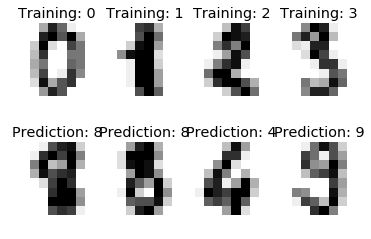

In [16]:
"""
================================
Recognizing hand-written digits
================================

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.

"""
import pandas as pd
%matplotlib notebook 
%matplotlib inline

print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()



In [17]:
print ( "Un exemple d'échantillon :")
pd.DataFrame(data).head()


Un exemple d'échantillon :


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
print("Nombre d'images =%s " %n_samples)

Nombre d'images =1797 


 Il s'agit d'un problème de multiclassification des images , on cherche à identifier les nombres à partir des images des digits écrites à la main ( des code posteaux écrits sur les enveloppes )
Le jeux de données comporte 1797 images  ( obsevations ) de taille 8*8=64 ( l'équivalent de 64 pixels) . On pourra dire qu'on a 1797 observations et 64 variables.

Text(0,0.5,'Cardinal')

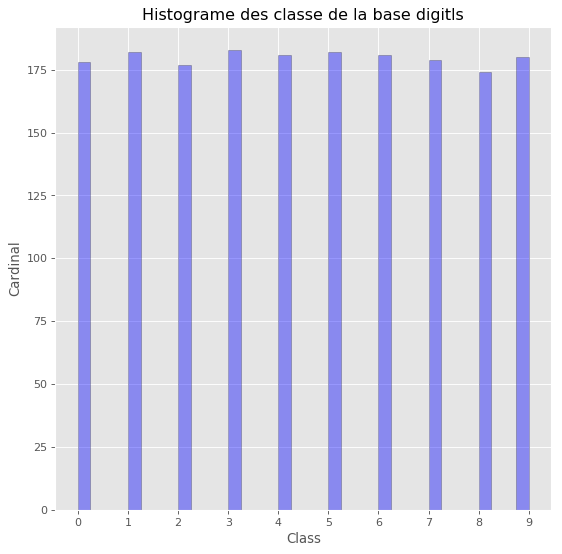

In [19]:
import seaborn as sns

###### plot de l'histogram des classes #####

## le target
y= digits.target
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

## distplot
sns.distplot(y, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.xticks([0,1,2,3,4,5,6,7,8,9], [0,1,2,3,4,5,6,7,8,9])
plt.title('Histograme des classe de la base digitls')
plt.xlabel('Class')
plt.ylabel('Cardinal')


On voit que les classes sont équilibrées . Essayons maintenant d'éliminer les colonnes nulles et splitter le jeux de données en train et test .

In [20]:



y= digits.target ## le target
df=pd.DataFrame(data) ## les covariables
df=df.loc[:, (df != 0).any(axis=0)] ## on supprime les colonnes nulles


X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.2, random_state = 0) # on split en train et test
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

Training set has (1437, 61) samples.
Testing set has (360, 61) samples.


On applique maintenant l'algorithme KNN sur le train et on fera l'évaluation sur le test

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import confusion_matrix
import math

k=30 ### fixons k à 30
h=10
clrKNN = KNeighborsClassifier(n_neighbors=k ,algorithm='brute',metric='mahalanobis',weights='uniform')

clrKNN = clrKNN.fit(X_train, y_train)
error_init = np.mean(clrKNN.predict(X_test) != y_test)
print("L'erreur de classification est : %.2f %%" % (100*error_init))
con_mat = confusion_matrix(y_test,clrKNN.predict(X_test), [0,1,2,3,4,5,6,7,8,9])
#print("Confusion matrix :%s" %con_mat)
#total_accuracy = sum([con_mat[i,i] for i in range(10)]) / float(np.sum(con_mat))
#print('Total accuracy: %.2f %%' %(100*total_accuracy))



L'erreur de classification est : 13.33 %


### Question 13
Estimation de la matrice de confusion

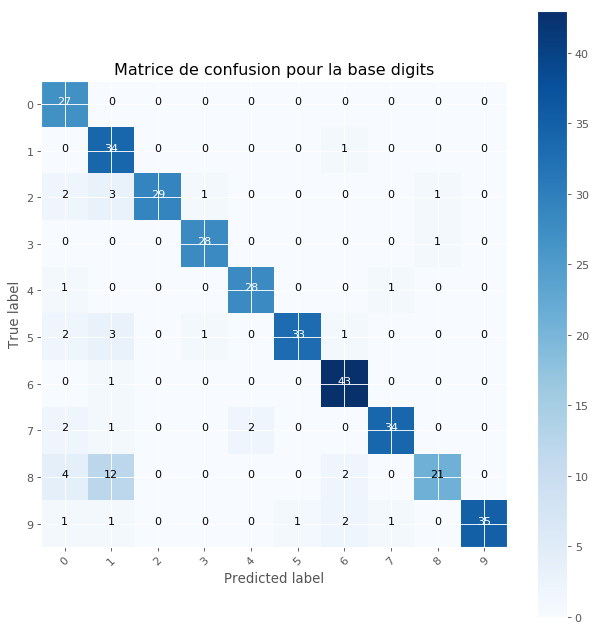

In [22]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('')

   #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

plot_confusion_matrix(con_mat, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Matrice de confusion pour la base digits')


### Question 14
Choix du paramètre k 

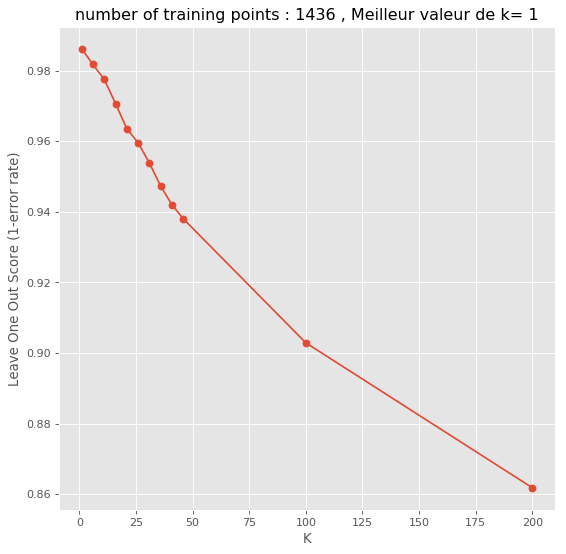

In [23]:
K_range=[1,6,11,16,21,26,31,36,41,46,100,200]

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

loocurve=LOOCurve(K_range,weights='uniform')
loocurve.fit_curve(X_train, y_train,n_iter=200,random_state=1,test_size_fraction=0.2) ## on a adapter la fonction 

#loocurve pour qu'elle sorte leeilleur K et on controlele test size fraction
loocurve.plot(maketitle=True)

In [24]:

k=1
h=10
clrKNN_best = KNeighborsClassifier(n_neighbors=k ,algorithm='brute',metric='mahalanobis',metric_params={'V': np.cov(X_rchecker_train)},weights=custom_weights(h=h))

clrKNN_best = clrKNN_best.fit(X_train, y_train)
error_best = np.mean(clrKNN_best.predict(X_test) != y_test)
print("_______________________________________")
print("Erreur Initiale |   Erreur après CV    ")
print("_______________________________________")
print("    %.2f %%     |        %.2f %%        " % (100*error_init,100*error_best))



_______________________________________
Erreur Initiale |   Erreur après CV    
_______________________________________
    13.33 %     |        7.50 %        


On voit bien que la cross-validation sur le paramètre k a amélioré la précision du modèle

## Analyse Discriminante Linéaire 
Le nom anglais est Linear Discirmiant Analysis (LDA). Il est préférable de se reporter à cette dénomination en vue de trouver de l’aide en ligne pour la partie numérique. Attention toutefois à ne pas confondre avec Latent Dirichlet Allocation qui est un modèle statistique hiérarchique pour données catégorielles et qui n’a pas de lien avec l’Analyse Discriminante Linéaire

### Question 15

Pour cette question , on utilisera la formule de Bayes :


$$
P(y=1 | x)=  \frac{P(x | y=1)* P(y=1)}{P(x)}  
$$
$$
or \: P(x)= P(x | y=1) * P(y=1)+ P(x| y=-1)* P(y=-1)
            =f_{+} \pi _{+} +  f_{-} \pi _{-} 
$$
$$
P(y=1 | x)=  \frac{f_{+} \pi _{+}}{f_{+} \pi _{+} +  f_{-} \pi _{-} }  
$$

De meme : 
$$
P(y=-1 | x)=  \frac{P(x | y=-1)* P(y=-1)}{P(x)}  
$$
$$
P(y=-1 | x)=  \frac{f_{-} \pi _{-}}{f_{+} \pi _{+} +  f_{-} \pi _{-} }  
$$

Or $$ \: \pi _{-}= 1 - \pi _{+}  $$
Donc : 
$$
P(y=-1 | x)=  \frac{f_{-} (1-\pi _{+})}{f_{+} \pi _{+} +  f_{-} (1-\pi _{+}) }  
$$

### Question 16 

$$
log(\frac{P( y=1 | x)} {P( y=-1 | x )})
= log( \frac{f_{+} \pi _{+}} {f_{-} \pi _{-}} )  \\
=log( \frac{\pi _{+}}{ (1-\pi _{+})} )+ log(\frac{f_{+}}{f_{-}}) \\
log(\frac{P( y=1 | x)} {P( y=-1 | x )})
=log( \frac{\pi _{+}}{ 1-\pi _{+}} ) -  \frac{1}{2} ( x-\mu_{+})^{T} \xi^{-1} ( x-\mu_{+}) + \frac{1}{2} ( x-\mu_{-})^{T} \xi^{-1} ( x-\mu_{-})
$$

### Question 17 
Pour notre cas , on est entrain de traiter une problématique de classification binaire {-1 , +1} . 
On prévilégera la classe +1 si : 
$$
\frac{P( y=1 | x)} {P( y=-1 | x )} > 1
$$
et la classe -1 sinon .
En utilisant les résultats de la question précedente , cela est équivalent à  :
$$
\\
$$
$$
log(\frac{P( y=1 | x)} {P( y=-1 | x )} )> 0
$$
$$
log( \frac{\pi _{+}}{ 1-\pi _{+}} ) -  \frac{1}{2} ( x-\mu_{+})^{T} \xi^{-1} ( x-\mu_{+}) + \frac{1}{2} ( x-\mu_{-})^{T} \xi^{-1} ( x-\mu_{-}) >0 
$$

Maintenant , essayons de simplifier quelques termes de l'inéquation en remplaçant les inconnues par leur estimateurs :
$$
log( \frac{\pi _{+}}{ 1-\pi _{+}} ) =log( \frac{m}{ n} ) - log( 1 - \frac{m}{ n} )
$$

et

$$
( x-\mu_{-})^{T} \xi^{-1} ( x-\mu_{-}) = ( x-\mu_{+}+\mu_{+}-\mu_{-})^{T} \xi^{-1} ( x-\mu_{+}+\mu_{+}-\mu_{-})\\
=( x-\mu_{+})^{T} \xi^{-1} ( x-\mu_{+}) +( \mu_{+}-\mu_{-})^{T} \xi^{-1} (\mu_{+}-\mu_{-}) + 
( x-\mu_{+})^{T} \xi^{-1} (\mu_{+}-\mu_{-})+( \mu_{+}-\mu_{-})^{T} \xi^{-1} ( x-\mu_{+})
$$

Or puisque le terme  $$ ( x-\mu_{+})^{T} \xi^{-1} (\mu_{+}-\mu_{-}) \ est \  un \ réel $$

$$
=( x-\mu_{+})^{T} \xi^{-1} ( x-\mu_{+}) +( \mu_{+}-\mu_{-})^{T} \xi^{-1} (\mu_{+}-\mu_{-}) + 
2 \ ( x-\mu_{+})^{T} \xi^{-1} (\mu_{+}-\mu_{-}) \\
=( x-\mu_{+})^{T} \xi^{-1} ( x-\mu_{+}) +( \mu_{+}-\mu_{-})^{T} \xi^{-1} (\mu_{+}-\mu_{-}) + 
2 \ ( x)^{T} \xi^{-1} (\mu_{+}-\mu_{-}) -2 \ (\mu_{+})^{T} \xi^{-1} (\mu_{+}-\mu_{-}) \\
$$

Si on exploite les expressions des estimateurs de $ \mu_{+} $ et $ \mu_{-} $  le fait que 
$$
 \Sigma \ I(y_{i}=+1)\ x_{i} = \Sigma\ (1-I(y_{i}=-1))\ x_{i} 
$$

On obtient : 

$$
 y= 1 \  \rightarrow \  ( x)^{T} \xi^{-1} (\mu_{+}-\mu_{-})  >   \frac{1}{2} (\mu_{+})^{T} \xi^{-1} (\mu_{+}) -  \frac{1}{2} (\mu_{-})^{T} \xi^{-1} (\mu_{-}) +log( 1 - \frac{m}{ n} )- log( \frac{m}{ n} ) \\
 y= -1  \ sinon
$$


## Question 18
Création du classifieur LDA " from scratch "

In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
import numpy as np

#""" Homemade kNN classifier class """

class LDAlassifier(BaseEstimator, ClassifierMixin):
    
    ## juste pour l'instanciation du classifier
    def __init__(self):
        pass
        
    ### la fonction fit permettant de calculer le threshhold de classifie    
    def fit(self, X, y):
        m =sum(y[y==1])
        n=len(y)
        nvar=X.shape[1]
        mu_plus=[(1/n)*np.mean(X[y==1,i]) for i in range(X.shape[1])]
        mu_moins=[(1/(n-m))*np.mean(X[y==-1,i]) for i in range(X.shape[1])]
        

        mean_vectors = []
        for k,cl in enumerate(np.sort(list(set(y)))) :
            mean_vectors.append(np.mean(X[y==int(cl)], axis=0))

        nvar=X.shape[1]
        nobs=X.shape[0]
        ### compute scatter matrix 
        S_W = np.zeros((nvar,nvar))
        for cl,mv in zip(np.sort(list(set(y))), mean_vectors):
            class_sc_mat = np.zeros((nvar,nvar))                  # scatter matrix for every class
            for row in X[y == cl]:
                row, mv = row.reshape(nvar,1), mv.reshape(nvar,1) # make column vectors
                class_sc_mat += (row-mv).dot((row-mv).T)
            #print("La matrice de la classe %s est \n %s"%(int(cl),class_sc_mat))
            S_W += class_sc_mat                             # sum class scatter matrices
        sigma=(1/(nobs-2))*S_W

        sigma_u=np.dot(np.linalg.inv(sigma),np.array([mu_plus[i]-mu_moins[i] for i in range(nvar)]))
        term1=1/2*np.dot(np.transpose(mu_plus),np.dot(np.linalg.inv(sigma),np.array(mu_plus)))
        term2=-1/2*np.dot(np.transpose(mu_moins),np.dot(np.linalg.inv(sigma),np.array(mu_moins)))
        term3=np.log(1-(m/n))-np.log(m/n)
        self.threshold=term1+term2+term3
        self.sigma_u=sigma_u
        return self
    
    ##  la fonction predict permettant prédire +1 ou -1  selon le critère de bayes
    def predict(self, prediction_points):
        points_labels=[]
        for x in prediction_points:
            x=np.array(x)
            term=np.dot(np.transpose(x),self.sigma_u)
            if term > self.threshold : 
                pred=1 
            else : 
                pred = -1
            
            points_labels.append(pred)
        
        return np.array( points_labels)

#### Sur le jeux de données  #1 :

In [54]:
########## splitting the data ##############

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print ("============= Jeux de données #1 =============\n")
### on augment un peu la variance d l'échantillon #1 
X_rgauss,y_rgauss=rand_bi_gauss(n1=100, n2=100, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.3, 0.5],
                  sigmas2=[0.1, 0.1])
X_train, X_test, y_train, y_test = train_test_split(X_rgauss,y_rgauss,test_size = 0.8, random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

########## fitting the LDAClassifier (Home made)  ##############

lda=LDAlassifier()
lda=lda.fit(X_train,y_train)

lda_scikit=LinearDiscriminantAnalysis()
lda_scikit=lda_scikit.fit(X_train,y_train)

########## calcul d'erreur de classification #######
error_1=np.mean(lda.predict(X_test) != y_test)
error_sickit_1=np.mean(lda_scikit.predict(X_test) != y_test)

pred_ldac=lda.predict(X_test)
pred_scikit=lda_scikit.predict(X_test)

print("__________________________________________________________________________")
print("Test error of LDACassifier |   Test error of LinearDiscriminantAnalysis   ")
print("__________________________________________________________________________")
print("    %.2f %%                 |        %.2f %%        " % ((100*error_1),(100*error_sickit_1)))

#con_mat = confusion_matrix(y_test,lda.predict(X_test), [-1,1])

print("Le nombre de fois où il y a une difference entre les deux prédictions : %s " %sum(lda_scikit.predict(X_test) != lda.predict(X_test)))
print("Soit: %.2f %% " %(100*sum(lda_scikit.predict(X_test) != lda.predict(X_test))/len(y_test)))

============= Jeux de données #1 =============

Training set has (40, 2) samples.
Testing set has (160, 2) samples.
__________________________________________________________________________
Test error of LDACassifier |   Test error of LinearDiscriminantAnalysis   
__________________________________________________________________________
    0.00 %                 |        0.00 %        
Le nombre de fois où il y a une difference entre les deux prédictions : 0 
Soit: 0.00 % 


#### Sur le jeux de données  #3

In [56]:
########## splitting the data ##############
test_size_frac=0.7
print ("============= Jeux de données #3 ============= \n" )
print ("============= test size = %.1f %% \n" %(100*test_size_frac))

X_train, X_test, y_train, y_test = train_test_split(X_rclown,y_rclown,test_size = test_size_frac, random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

########## fitting the LDAClassifier  ##############

lda=LDAlassifier()
lda=lda.fit(X_train,y_train)


lda_scikit=LinearDiscriminantAnalysis()
lda_scikit=lda_scikit.fit(X_train,y_train)

########## calcul d'erreur de classification #######
error_3=np.mean(lda.predict(X_test) != y_test)
error_sickit_3=np.mean(lda_scikit.predict(X_test) != y_test)


print("__________________________________________________________________________")
print("Test error of LDACassifier |   Test error of LinearDiscriminantAnalysis   ")
print("__________________________________________________________________________")
print("    %.2f %%                 |        %.2f %%        " % ((100*error_3),(100*error_sickit_3)))


print("Le nombre de fois où il y a une difference entre les deux prédictions : %s " %sum(lda_scikit.predict(X_test) != lda.predict(X_test)))
print("Soit: %.2f %% " %(100*sum(lda_scikit.predict(X_test) != lda.predict(X_test))/len(y_test)))



============= Jeux de données #3 ============= 

============= test size = 70.0 % 

Training set has (60, 2) samples.
Testing set has (140, 2) samples.
__________________________________________________________________________
Test error of LDACassifier |   Test error of LinearDiscriminantAnalysis   
__________________________________________________________________________
    51.43 %                 |        55.71 %        
Le nombre de fois où il y a une difference entre les deux prédictions : 24 
Soit: 17.14 % 


L'algorithme LDAClassifier implémenté donne des résultats très proches de ceux de scikit-learn . On a la meme précision sur le jeux de donnée #1 et une légère différence sur le jeux de données #3 . Cela pourrait etre du aux paramètres standards de scikit learn et surtout le fait que le premier jeux de données comporte des données linéairement séaprable.

## Question 20

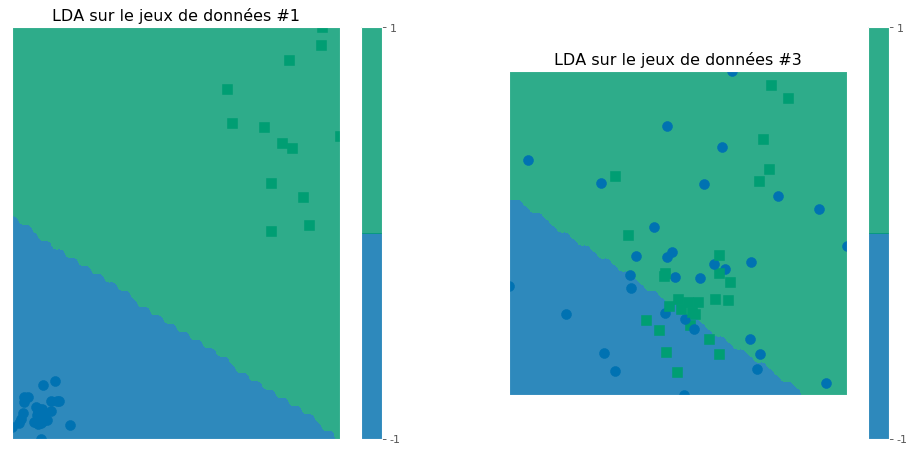

In [44]:

##"============= Jeux de données #1 =============\n")
### on augment un peu la variance d l'échantillon #1 
X_rgauss,y_rgauss=rand_bi_gauss(n1=100, n2=100, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.3, 0.5],
                  sigmas2=[0.1, 0.1])
X_train, X_test, y_train, y_test = train_test_split(X_rgauss,y_rgauss,test_size = 0.8, random_state = 0)

def reshapefrontiere(X) :
    return lda.predict(X.reshape(1,-1))

figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")
plt.subplot(2,2,1)
frontiere_new(reshapefrontiere, X_train,y_train, w=None, step=50, alpha_choice=1, colorbar=True,
                   samples=True)
plt.title("LDA sur le jeux de données #1")



##"============= Jeux de données #3=============\n")

########## splitting the data ##############
test_size_frac=0.7

X_train, X_test, y_train, y_test = train_test_split(X_rclown,y_rclown,test_size = test_size_frac, random_state = 0)

########## plot###########################
def reshapefrontiere(X) :
    return lda.predict(X.reshape(1,-1))

plt.subplot(2,2,2)
plt.title("LDA sur le jeux de données #3")

frontiere_new(reshapefrontiere, X_train,y_train, w=None, step=50, alpha_choice=1, colorbar=True,
                   samples=True)


D'après les graphes , le classifieur LDA se comporte bien sur le premier jeux de données avec une précision très grande , voire parfaite . Par contre , ce classifieur ne performe pas bien sur le jeux de données # qui exige des frontières plus complexes . L'algorithme KNN devait fonctionner beaucoup mieux que le LDA sur le jeux de données 3.

## Méthode discriminative avec régression logistique

### Question 21
 Appliquez la classification par régression logistique sur les données rand_bi_gauss


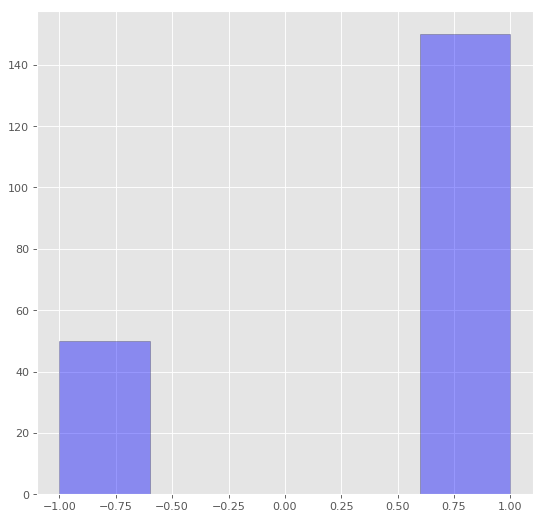

In [31]:
from sklearn import linear_model
import seaborn as sns

X_rgauss_imbalanced,y_rgauss_imbalanced=rand_bi_gauss(n1=150, n2=50, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.1, 0.1],
                  sigmas2=[0.1, 0.1])
y= y_rgauss_imbalanced
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")
sns.distplot(y,hist=True,kde=False, 
             bins=int(5),color ='blue',
             hist_kws={'edgecolor':'black'})

========= Jeux de données #1 aveec des classes non équlibrées =========== 

========= test size = 20.0 % 

Training set has (160, 2) samples.
Testing set has (40, 2) samples.
Test error of LogisticRegression = 0.00 %



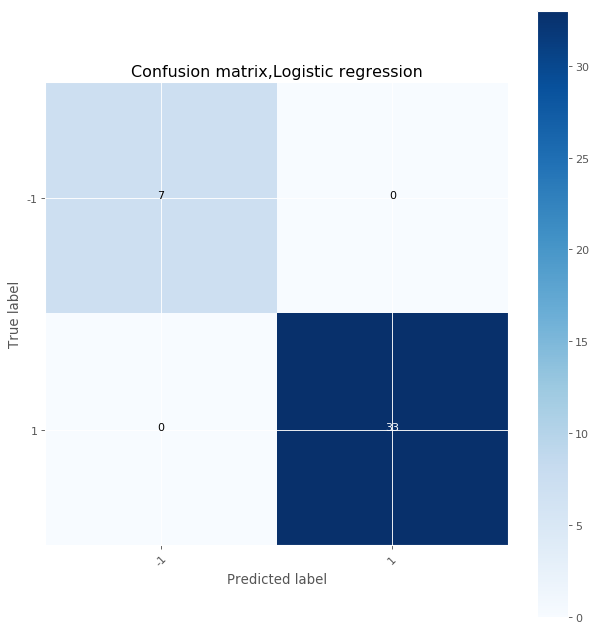

In [32]:
########## splitting the data ##############
test_size_frac=0.2
print ("========= Jeux de données #1 aveec des classes non équlibrées =========== \n" )
print ("========= test size = %.1f %% \n" %(100*test_size_frac))

X_train, X_test, y_train, y_test = train_test_split(X_rgauss_imbalanced,y_rgauss_imbalanced,test_size = test_size_frac, random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

########## fitting the LDAClassifier  ##############


logit_model=linear_model.LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)


########## calcul d'erreur de classification #######
error_logit=np.mean(logit_model.predict(X_test) != y_test)
print ( "Test error of LogisticRegression = %.2f %%" %(100*error_logit))
con_mat = confusion_matrix(y_test,logit_model.predict(X_test), [-1,1])

###########plot#######################

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

plot_confusion_matrix(con_mat, classes=[-1,1],
                      title='Confusion matrix,Logistic regression')

========= Jeux de données #1 aveec des classes non équlibrées =========== 

========= test size = 60.0 % 

Training set has (80, 2) samples.
Testing set has (120, 2) samples.

__________________________________________________________________________
Test error of Logistic regression |   Test error of LDA  
__________________________________________________________________________
    5.00 %                       |        0.00 %        


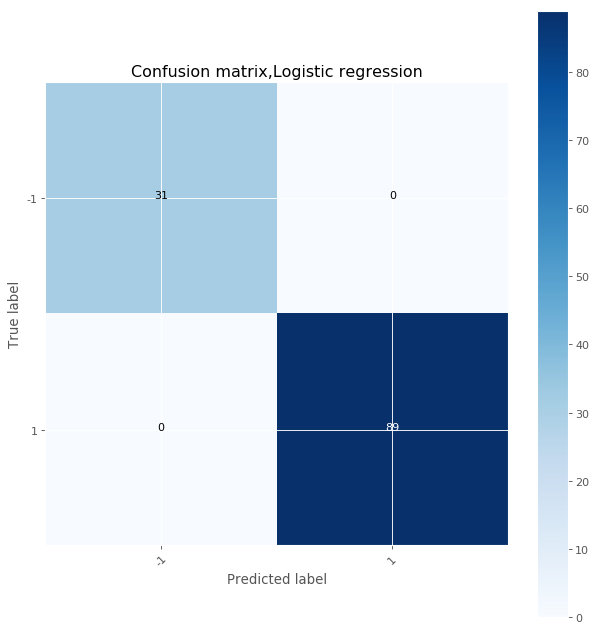

In [58]:
########## splitting the data ##############
test_size_frac=0.6
print ("========= Jeux de données #1 aveec des classes non équlibrées =========== \n" )
print ("========= test size = %.1f %% \n" %(100*test_size_frac))

X_train, X_test, y_train, y_test = train_test_split(X_rgauss_imbalanced,y_rgauss_imbalanced,test_size = test_size_frac, random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

########## fitting the LDAClassifier  ##############


lda=LDAlassifier()
lda=lda.fit(X_train,y_train)


########## calcul d'erreur de classification #######
error_lda=np.mean(lda.predict(X_test) != y_test)
#print ( "Test error of LDA = %.2f %%" %(100*error_lda))
con_mat = confusion_matrix(y_test,lda.predict(X_test), [-1,1])

###########plot#######################

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

#plot_confusion_matrix(con_mat, classes=[-1,1],
 #                     title='Confusion matrix,Logistic regression')


print("__________________________________________________________________________")
print("Test error of Logistic regression |   Test error of LDA  ")
print("__________________________________________________________________________")
print("    %.2f %%                       |        %.2f %%        " % ((100*error_logit),(100*error_lda)))


Sur le jeux de données simulées avec des classes non équilibrées , le modèle LDA est meilleur que la regression logistique .

## Question 22
L'attribut "coef_" du modèle de regréssion logistique renvoie les coefficients des covariables X1 et X2 du jeux de donnnées

In [34]:
logit_model.coef_

array([[2.11165589, 2.13726361]])

L'attribu "intercept_" correspond à l'intercept du modèle

In [35]:
logit_model.intercept_

array([0.33292628])

## Question 23

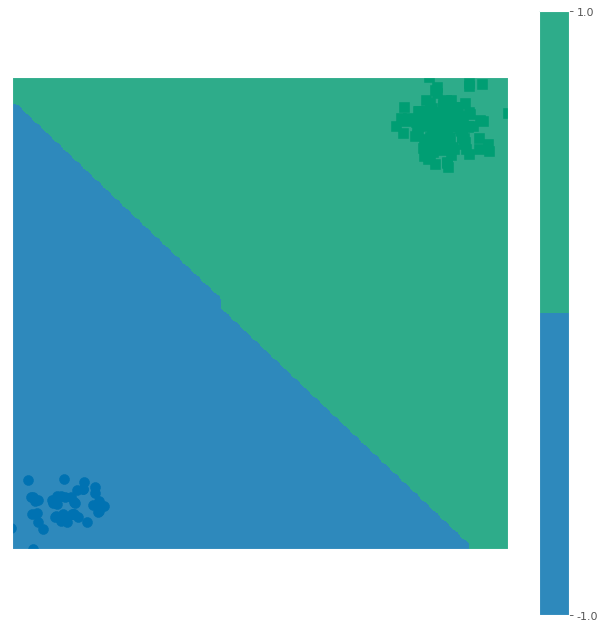

In [36]:
########## plot###########################
def reshapefrontiere(X) :
    return logit_model.predict(X.reshape(1,-1))

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use("ggplot")

frontiere_new(reshapefrontiere, X_train,y_train, w=None, step=50, alpha_choice=1, colorbar=True,
                   samples=True)

Le modèle de régression logistique sépare bien les deux classe du premier jeux de données. 

## Question 24

In [37]:
y= digits.target
df=pd.DataFrame(data)
df=df.loc[:, (df != 0).any(axis=0)]
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.2, random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

logit_model=linear_model.LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)


########## calcul d'erreur de classification #######
error_logit=np.mean(logit_model.predict(X_test) != y_test)
print ( "Test error of LogisticRegression = %.2f %%" %(100*error_logit))
con_mat = confusion_matrix(y_test,logit_model.predict(X_test), [-1,1])



Training set has (1437, 61) samples.
Testing set has (360, 61) samples.
Test error of LogisticRegression = 5.00 %


Le modèle de régression performe 